<a href="https://colab.research.google.com/github/zakariabeni/Interactive-Statistics-Notebooks/blob/master/Fisher's_Exact_Test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Fisher's Exact Test**

### **Table of Contents**
- Introduction
- Fisher's Exact Test
- When use Fisher’s Exact test?
- Application
- Conclusion

### **Introduction**
In statistics, an exact (significance) test is a test where if the null hypothesis is true then all assumptions are met. Using an exact test provides a significance test that keeps the Type I error rate of the test (α) at the desired significance level of the test. For example, an exact test at significance level of α = 5%, when repeating the test over many samples where the null hypotheses is true, will reject at most 5% of the time. 

Most statistical tests calculate a p-value based on how a statistic (e.g. a mean or a proportion) is distributed. In contrast, exact tests calculate a p-value empirically. Exact tests calculate the empirical probability of getting an outcome as different or more from the null hypothesis, compared to the outcome observed in the data.


### **Fisher's Exact Test**
![alt text](https://upload.wikimedia.org/wikipedia/commons/a/aa/Youngronaldfisher2.JPG)

Sir Ronald Aylmer Fisher (17 February 1890 – 29 July 1962) was a British statistician and the single most important figure in the $20^{th}$ century statistics. One of his greatest contributions to modern statistics was “**Fisher’s Exact Test**”.

Fisher’s exact test is used to determine whether there is a significant association between two categorical variables in a contingency table. 
> In statistics, a **contingency table** is a type of table in matrix format that displays the (multivariate) frequency distribution of the variables.

Fisher’s exact test is used to calculate the probability that proportions as or more extreme than the proportions we observed are caused by random chance. By keeping the row and column totals fixed and using permutations and combinations to determine the probability of every possible contingency table, Fisher’s exact test formula can be described as hypergeometric probability as follows:

![alt text](https://res.cloudinary.com/awesomecloud9/image/upload/v1586498305/Table_Fisher.png)
![alt text](https://res.cloudinary.com/awesomecloud9/image/upload/v1586498169/Fisher_Eq.png)

### **When use Fisher’s Exact test?**
Fisher’s exact test is an alternative to Pearson’s chi-squared test for independence. While actually valid for all sample sizes, Fisher’s exact test is practically applied when sample sizes are small. A general recommendation is to use Fisher’s exact test, instead of the chi-squared test, whenever more than 20% of cells in a contingency table have expected frequencies < 5.

> Use **Fisher's Exact Test**,
- When n ≤ 20 in 2 × 2 matrix
- When fewer than 80% of the categories have expected values of < 5.


The **null hypothesis** for the test is that there is no association between the rows and columns of the 2 × 2 table, such that the probability of a subject being in a particular row is not influenced by being in a particular column. An important assumption for Fisher’s Exact test is that the binary data are independent.
> Assumption,
- Nominal data (i.e., categorical) are independent obeservations.
- Data is not biased. 

### **Application**
**Example: Trial of New Covid-19 Vaccines**

We will evaluate developed vaccine for Covid-19. We want to determine if there any association between gender differences and susceptibility and resistance after vaccination to the virus.There are 26 observations in total with the distribution data as follows.

![alt text](https://res.cloudinary.com/awesomecloud9/image/upload/v1586498169/Question.png)

In [0]:
# import libraries
import numpy as np 
import pandas as pd
import scipy
import scipy.special

**Hypothesis**
> The null hypothesis ($H_{0}$) is that males and females are equally same in response to the vaccine or the difference of the response to the vaccine between males and females that observed is not significant. The alternative hypothesis ($H_{a}$) is that the response to the vaccine is higher or lower among the males than among the females, or the difference of response is significant.

**Check when use Fisher's exact test**

In [2]:
# Observed value
# create contingency table with the marginal totals and the grand total. 
ar = np.array([[1.0, 8.0],[13.0, 4.0]])    
df = pd.DataFrame(ar, columns=["Susceptible", "Resistant"])
df.index = ["Males", "Females"] 
df2 = df.copy()
df2.loc['Column_Total'] = df2.sum(numeric_only=True, axis=0)
df2.loc[:,'Row_Total'] = df2.sum(numeric_only=True, axis=1)
df2

,Susceptible,Resistant,Row_Total
Males,1.0,8.0,9.0
Females,13.0,4.0,17.0
Column_Total,14.0,12.0,26.0


> When n ≤ 20 in 2 × 2 matrix --> **NO** n > 20, n = 26

In [3]:
# Expected value
n=df2.at["Column_Total", "Row_Total"]  # grand total 

exp=df2.copy()               # create dataframe with expected frequencies
for x in exp.index[0:-1]:
    for y in exp.columns[0:-1]:
        # round expected values to nearest hundredths:
        v= (((df2.at[x, "Row_Total"]) * (df2.at["Column_Total", y])   )   /n ).round(2) 
        exp.at[x,y]=float(v)

exp

,Susceptible,Resistant,Row_Total
Males,4.85,4.15,9.0
Females,9.15,7.85,17.0
Column_Total,14.00,12.00,26.0


> When fewer than 80% of the categories have expected values of < 5.
--> **YES**, only 50% of the cells > 5.

> **So, because at least one of the criteria is met, we can use Fisher's Exact Test.**

**Step 1**
Use the hypergeometric distribution to determine the probability that the observed outcome occur by random change.

For example, the probability of obtaining our observed data is

![alt text](https://res.cloudinary.com/awesomecloud9/image/upload/v1586498169/Ans_Eq.png)

In [4]:
# find the probability of observed data as part of particular contingency table.
def p(a): 
    v=(scipy.special.binom(int(df2.iloc[0,2]), a) * scipy.special.binom(int(df2.iloc[1,2]), (int(df2.iloc[2,0])-a)) )/scipy.special.binom(n, int(df2.iloc[2,0]))
    return v

p(1) # we use "a=1" following probability of (1) in contingency table below

0.0022179193803907762

**Determine All Possible Contingency Tables**

There are 10 different ways of rearranging the cell frequencies for the table whilst keeping the marginal totals the same. The result that corresponds to our observed cell frequencies is `(1)`.

In [5]:
from google.colab import widgets
t = widgets.TabBar(["0", "1", "2", "3", "4", "5", 
                    "6", "7", "8", "9"])
a = range(0, 10)
b = range(0, 10)
c = range(5, 15)
d = range(3, 13)

for i in range(len(a)):
    with t.output_to(i):
        ar=np.array([[min(a)+i, max(b)-i],[max(c)-i, min(d)+i]])    
        df=pd.DataFrame(ar, columns=["Susceptible", "Resistant"])
        df.index=["Males", "Females"]
        print(df)

# Tab "1" is our observed data

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Susceptible  Resistant
Males              0          9
Females           14          3


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Susceptible  Resistant
Males              1          8
Females           13          4


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Susceptible  Resistant
Males              2          7
Females           12          5


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Susceptible  Resistant
Males              3          6
Females           11          6


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Susceptible  Resistant
Males              4          5
Females           10          7


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Susceptible  Resistant
Males              5          4
Females            9          8


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Susceptible  Resistant
Males              6          3
Females            8          9


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Susceptible  Resistant
Males              7          2
Females            7         10


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Susceptible  Resistant
Males              8          1
Females            6         11


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

         Susceptible  Resistant
Males              9          0
Females            5         12


<IPython.core.display.Javascript object>

And for all difference ways can be summarized as follows:

In [6]:
df3 = pd.DataFrame({'a': range(0, 10, 1),
                    'b': range(9, -1, -1),
                    'c': range(14, 4, -1),
                    'd': range(3, 13, 1)})

df4 = pd.concat([df3, pd.DataFrame({'a+b': df3.a + df3.b,
                                    'c+d': df3.c + df3.d,
                                    'a+c': df3.a + df3.c,
                                    'b+d': df3.b + df3.d,
                                    'n': df3.a + df3.b + df3.c + df3.d})], axis=1)

df5 = pd.concat([df4, pd.DataFrame({'a+bCa': scipy.special.comb(df4['a+b'], df3.a),
                                    'c+dCc': scipy.special.comb(df4['c+d'], df3.c),
                                    'nCa+c': scipy.special.comb(df4['n'], df4['a+c'])})], axis=1)

df6 = pd.concat([df5, pd.DataFrame({'p-value': df5['a+bCa'] * df5['c+dCc'] / df5['nCa+c']})], axis=1)
df7 = pd.concat([df6, pd.DataFrame({'pcutoff≤p': df6['p-value'][1] >= df6['p-value']})], axis=1)
df7

,a,b,c,d,a+b,c+d,a+c,b+d,n,a+bCa,c+dCc,nCa+c,p-value,pcutoff≤p
0,0,9,14,3,9,17,14,12,26,1.0,680.0,9657700.0,0.000070,True
1,1,8,13,4,9,17,14,12,26,9.0,2380.0,9657700.0,0.002218,True
2,2,7,12,5,9,17,14,12,26,36.0,6188.0,9657700.0,0.023066,False
3,3,6,11,6,9,17,14,12,26,84.0,12376.0,9657700.0,0.107643,False
4,4,5,10,7,9,17,14,12,26,126.0,19448.0,9657700.0,0.253730,False
5,5,4,9,8,9,17,14,12,26,126.0,24310.0,9657700.0,0.317162,False
6,6,3,8,9,9,17,14,12,26,84.0,24310.0,9657700.0,0.211442,False
7,7,2,7,10,9,17,14,12,26,36.0,19448.0,9657700.0,0.072494,False
8,8,1,6,11,9,17,14,12,26,9.0,12376.0,9657700.0,0.011533,False
9,9,0,5,12,9,17,14,12,26,1.0,6188.0,9657700.0,0.000641,True


**Step 2**
Calculate `p-value`.

In [7]:
total_p = 0
for i in range(len(df7)):
    if df7['pcutoff≤p'][i] == True:
       total_p += df7['p-value'][i]
       
print(f"p-value is {total_p}")

p-value is 0.002929061784897025


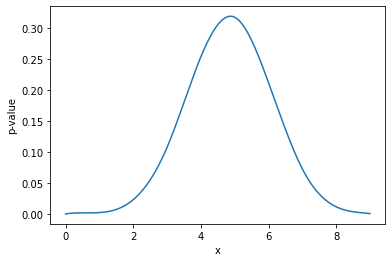

In [8]:
import matplotlib.pyplot as plt 
from scipy.interpolate import make_interp_spline
 
x1 = df7['a'] 
y1 = df7['p-value'] # p-value points

# 300 represents number of points to make between x1.min and x1.max for smoothing
xnew = np.linspace(x1.min(), x1.max(), 300)  
spl = make_interp_spline(x1, y1, k=3)
power_smooth = spl(xnew)

plt.plot(xnew,power_smooth)
plt.ylabel('p-value')
plt.xlabel('x')
plt.show()

The result shows that the probability of obtaining our observed frequencies for `(1)` gives `P = 0.00221792` and probability of obtaining our results or results more extreme (a difference that is at least as large) is the sum of the probabilities for `(0)` to `(1)` = `0.00228832`‬. This gives the **one-sided P-value** for obtaining our results or results more extreme. 

In order to obtain the **two-sided P-value** there are several approaches.
- Simply double the value of one-sided, which gives `0.00457664`.‬
- Add together all the probabilities that are the same size or smaller than our observed result. In this case, all probabilities that are less than or equal to `0.00221792`, are `(0)`, `(1)`, and `(9)`. This gives a two-sided value of `P = 0.00292906`‬.
- Swinscow and Campbell introduced a *mid-P method*, which computes half the value of the observed table and the sum of the more extreme probabilities. This gives `P = 0.00181996`.


**Simplified Calculation**

In [9]:
# All calculation above can be simplified using this code
# In our contingency table, the question refers to (1).
p_observed = p(1)

p_list = []
# calculate p(a) for every possible table we can get given the fixed margins...
for i in range(int(df2.iloc[0,2]) + 1):
    if p(i) <= p_observed:
        # append these probabilites to p_list only if <= p_observed
        p_list.append(p(i))
        
# the sum of this list corresponds to the p-value         
p_val = np.sum(p_list) 
print(f"p-value is {p_val}")

p-value is 0.002929061784897025


In [10]:
# Using Python's built-in function
import scipy.stats as stats

oddsratio, pvalue = stats.fisher_exact([[1.0, 8.0],[13.0, 4.0]])  
print(f"p-value is {pvalue}")

# both p-values are identical with second approach to obtain the two-sided p-value

p-value is 0.002929061784897022


**Step 3**
Compare calculated `p-value` to `α = 0.05`

We will accept ($H_{0}$) when `p-value` is larger than or equal to `α`. For our example, the `p-value` is less than 0.05 (the nominal level for statistical significance). Therefore ($H_{0}$) is rejected.

**We can conclude that there is evidence of a statistically significant difference in the response to vaccine between the males and females**. 
By rejecting ($H_{0}$), we can say that there is gender-biased in effectiveness of the vaccine.

#### Notes: 
- The one-sided Fisher’s tests if a result is greater than or less than a certain amount. The two-sided Fisher’s tests if a result is different from a certain proportion. In most cases, you’ll probably use a two-sided test.
- The criticism of the first two methods is that they are too conservative, i.e. if the null hypothesis was true, over repeated studies they would reject the null hypothesis less often than 5 per cent.
- The *mid-P value method* is less conservative, and gives approximately the correct rate of type I errors (false positives).
- In common with other non-parametric tests, Fisher’s Exact test is simply a hypothesis test. It will merely tell you whether a difference is likely, it gives you no information about the likely size of the difference.

### **Conclusion**
Fisher’s Exact test is used for analyzing simple 2 × 2 contingency tables when the assumptions for the Chi-squared test are not met.

An alternative exact test, Barnard's exact test, has been developed and proponents of it suggest that this method is more powerful, particularly in 2 × 2 tables. Another alternative is to use maximum likelihood estimates to calculate a p-value from the exact binomial or multinomial distributions and reject or fail to reject based on the P-value.

### **References**
- [Exact test](https://en.wikipedia.org/wiki/Exact_test)
- [Fisher's exact test](https://en.wikipedia.org/wiki/Fisher's_exact_test)
- [Fisher's exact test from scratch with python](https://towardsdatascience.com/fishers-exact-test-from-scratch-with-python-2b907f29e593)
- [Fisher's exact test independence](https://www.statisticshowto.com/fishers-exact-test-independence/) 
- [Tutorial Fisher's exact test](https://www.sheffield.ac.uk/polopoly_fs/1.43998!/file/tutorial-9-fishers.pdf) 
- [Fisher's Exact Test with Excel](https://www.youtube.com/watch?v=CtFBfja3EDc)
